In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# Function that counts the number of variables and records of a DataFrame

# INPUT:
# df: DataFrame with the data
# OUTPUT:
# n_variables: number of variables of the DataFrame
# n_records: number of records of the DataFrame

def count_variables_records(df):
    columns_to_count = [col for col in df.columns if col != 'ID']
    n_variables = len(columns_to_count)
    n_records = len(df)
    print('Number of variables:', n_variables)
    print('Number of records:', n_records)

# Function that calculates the percentage of missing values of each column of a DataFrame

# INPUT:
# df: DataFrame with the data
# OUTPUT:
# missing_values: DataFrame with the percentage of missing values of each column

def missing_values(df):
    missing_values = pd.DataFrame(df.isnull().sum()/len(df)*100, columns=['% Missing values'])
    missing_values = missing_values.sort_values(by='% Missing values', ascending=False)
    return missing_values

# Function that imputes the missing values of a DataFrame

# INPUT:
# df: DataFrame with the data
# datetime_columns: list with the names of the datetime columns
# OUTPUT:
# non_datetime_imputed: DataFrame with the missing values imputed

def impute_missing_values(df, datetime_columns):
    non_datetime_df = df.drop(columns=datetime_columns)
    imputer = IterativeImputer(max_iter=10, random_state=0)
    non_datetime_imputed = pd.DataFrame(imputer.fit_transform(non_datetime_df), columns=non_datetime_df.columns, index=non_datetime_df.index)
    non_datetime_imputed = non_datetime_imputed.round().astype(int) # Cast to int to avoid float values
    # Add the datetime columns back
    for col in datetime_columns:
        non_datetime_imputed[col] = df[col]
    return non_datetime_imputed

In [3]:
# We load the original dataset and seeing that the Age variable does not have null values in the records that interest us, we use it to remove the records that do not have a value in this variable
df = pd.read_excel('BASE_DATOS.xlsx', engine='openpyxl')
print("Original number of records:", len(df))
print("Original number of columns:", len(df.columns))
# We print the list of Id values of the removed records
list_edad = df[df['Edad'].isnull()]['Id'].tolist()
print(list_edad)

df = df.drop(df[df['Edad'].isnull()].index)
print("Number of records after removing null rows:", len(df))

Original number of records: 2478
Original number of columns: 290
[62, 63, 68, 72, 81, 94, 103, 110, 114, 118, 283, 303, 318, 401, 409, 639, 765, 937, 1027, 1064, 1065, 1084, 1164, 1191, 1258, 1291, 1294, 1339, 1357, 1367, 1369, 1370, 1375, 1380, 1381, 1382, 1387, 1388, 1392, 1397, 1404, 1417, 1418, 1419, 1423, 1425, 1433, 1440, 1455, 1464, 1477, 1487, 1500, 1520, 1937, 2203]
Number of records after removing null rows: 2422


In [4]:
# We start by removing some patients that do not provide much information for our analysis focused on social factors

# We can see that the patients have family history but there are too many missing values in important variables
df = df.drop(df[df['Id'] == 305].index)
df = df.drop(df[df['Id'] == 375].index)
df = df.drop(df[df['Id'] == 625].index)
df = df.drop(df[df['Id'] == 733].index)
df = df.drop(df[df['Id'] == 776].index)
df = df.drop(df[df['Id'] == 1288].index)
df = df.drop(df[df['Id'] == 1745].index)
df = df.drop(df[df['Id'] == 1886].index)
df = df.drop(df[df['Id'] == 1946].index)
df = df.drop(df[df['Id'] == 1966].index)

**Initial analyses**

count    2412.000000
mean       66.047678
std        11.709704
min        28.000000
25%        58.000000
50%        66.000000
75%        75.000000
max        93.000000
Name: Edad, dtype: float64


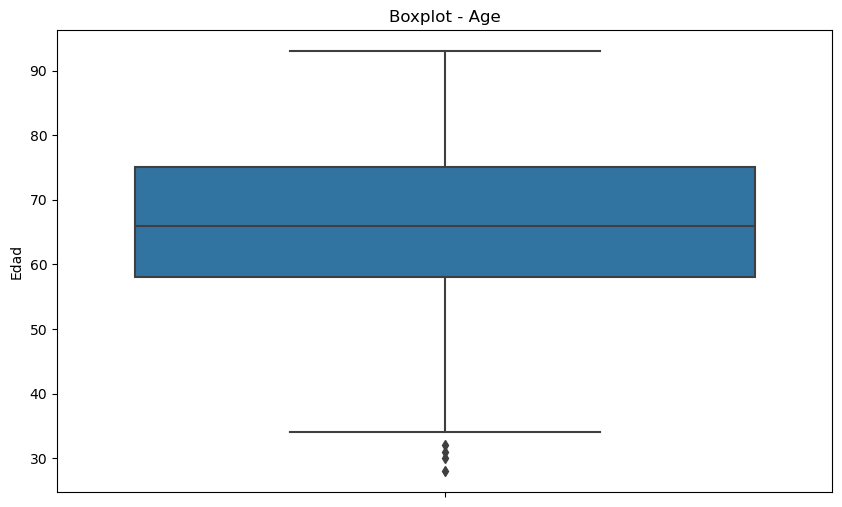

[1136, 1510, 1751, 2113]
count    2408.000000
mean       66.107143
std        11.627910
min        34.000000
25%        58.000000
50%        66.000000
75%        75.000000
max        93.000000
Name: Edad, dtype: float64


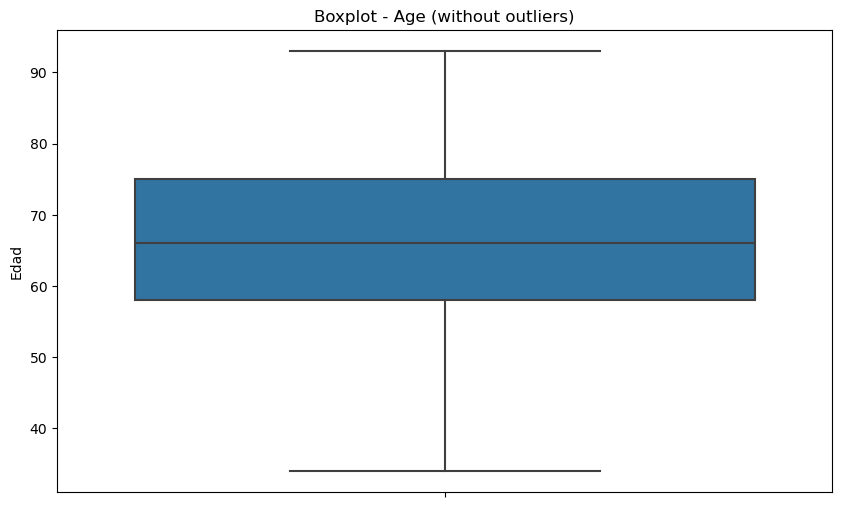

In [5]:
# statistical summary of the Age variable
print(df['Edad'].describe())

# box plot of the Age variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Edad'])
plt.title('Boxplot - Age')
plt.show()

Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile(0.75)
IQR = Q3 - Q1
# we calculate the lower and upper bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
# we print the outliers
outliers = df[(df['Edad']<lower_bound)|(df['Edad']>upper_bound)]['Id'].tolist()
print(outliers)
# we remove the outliers
df = df[(df['Edad']>=lower_bound)&(df['Edad']<=upper_bound)]

# we calculate the new statistical summary of the Age variable
print(df['Edad'].describe())

# we plot the new box plot of the Age variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Edad'])
plt.title('Boxplot - Age (without outliers)')
plt.show()

In [6]:
# SEX - Sex of the patient

# We check that the Sexo variable does not have null values
print(df['Sexo'].isnull().sum())
# We check the different values of the Sexo variable
print(df['Sexo'].value_counts())

0
Sexo
2.0    1851
1.0     557
Name: count, dtype: int64


In [7]:
# URB_RES - Urban or rural residence of the patient

# We check if there are null values in the variable LugarResidencia.PSS
print(df['LugarResidencia.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_lugar_residencia = df[df['LugarResidencia.PSS'].isnull()]['Id'].tolist()
print(list_lugar_residencia)
# We check the different values of the LugarResidencia.PSS variable
print(df['LugarResidencia.PSS'].value_counts())

4
[1885, 1962, 1971, 2024]
LugarResidencia.PSS
1.0    1366
2.0    1038
Name: count, dtype: int64


In [8]:
# EDU_LVL - Education level of the patient

# We check if there are null values in the variable NivelEstudios.PSS
print(df['NivelEstudios.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_nivel_estudios = df[df['NivelEstudios.PSS'].isnull()]['Id'].tolist()
print(list_nivel_estudios)
# We check the different values of the NivelEstudios.PSS variable
print(df['NivelEstudios.PSS'].value_counts())

5
[1885, 1962, 1971, 2024, 2111]
NivelEstudios.PSS
2.0    1241
3.0     615
4.0     389
1.0     158
Name: count, dtype: int64


In [9]:
# FHxIHD - Family history of ischemic heart disease 

# We check that the HFdeC.isquemica variable does not have null values
print(df['HFdeC.isquemica'].isnull().sum())
# We check the different values of the HFdeC.isquemica variable
print(df['HFdeC.isquemica'].value_counts())

0
HFdeC.isquemica
1.0    1459
2.0     949
Name: count, dtype: int64


In [10]:
# BMI - Body mass index of the patient. First we check the missing values of the variables Peso and Talla

# We assign the value of the variable 'Peso.PSS' to the variable 'Peso' when the latter is null
df['Peso'] = df['Peso'].fillna(df['Peso.PSS'])
# and we assign the value of the variable 'Talla.PSS' to the variable 'Talla' when the latter is null
df['Talla'] = df['Talla'].fillna(df['Talla.PSS'])
# We show the patients with a weight difference greater than 5 to check if there are any outliers
df['diff_weight'] = df.apply(lambda row: row['Id'] if not pd.isnull(row['Peso']) and not pd.isnull(row['Peso.PSS']) and abs(row['Peso'] - row['Peso.PSS']) > 5 else None, axis=1)
# Now we show the patients with a height difference greater than 5 to check if there are any outliers
df['diff_height'] = df.apply(lambda row: row['Id'] if not pd.isnull(row['Talla']) and not pd.isnull(row['Talla.PSS']) and abs(row['Talla'] - row['Talla.PSS']) > 5 else None, axis=1)
ids_diff_weight = df.dropna(subset=['diff_weight'])['Id']
print("IDs with weight difference greater than 5:", ids_diff_weight.tolist())
ids_diff_height = df.dropna(subset=['diff_height'])['Id']
print("IDs with height difference greater than 5:", ids_diff_height.tolist())

IDs with weight difference greater than 5: [865, 965, 1097, 1150, 1229]
IDs with height difference greater than 5: [965, 1097, 1264, 2387]


In [11]:
# We correct some values of the variables

# Patient ID 865:
# We change the value of Weight from 30 to the value of Weight.PSS which is 80
df.loc[df['Id'] == 865, 'Peso'] = 80

# Patient ID 965:
# We exchange the values of Weight and Height(Talla)
df.loc[df['Id'] == 965, 'Peso'] = 90
df.loc[df['Id'] == 965, 'Talla'] = 170

# For the patient with ID 1097, we delete the value of FechaKT.PSS
df.loc[df['Id'] == 1097, 'FechaKT.PSS'] = None
# and we shift the values from Peso.PSS to UsaSkype one value to the right
shifted_values = df.loc[df['Id'] == 1097, 'Peso.PSS':'UsaSkype'].shift(1, axis=1)
for col in shifted_values.columns:
    df.loc[df['Id'] == 1097, col] = shifted_values[col]

# For the patient with ID 1229 we change the value of Peso.PSS to 62 and the height to 150
df.loc[df['Id'] == 1229, 'Peso.PSS'] = 62
df.loc[df['Id'] == 1229, 'Talla.PSS'] = 150

# For the patient with ID 1264, the criterion chosen is to take the correct height as the average between the columns Talla and Talla.PSS
df.loc[df['Id'] == 1264, 'Talla'] = (df.loc[df['Id'] == 1264, 'Talla'] + df.loc[df['Id'] == 1264, 'Talla.PSS'])/2

# For the patient 2387, the height is 195
df.loc[df['Id'] == 2387, 'Talla'] = 195

C:\Users\juanm\AppData\Local\Temp\ipykernel_11084\2685960435.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted_values[col]
C:\Users\juanm\AppData\Local\Temp\ipykernel_11084\2685960435.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted_values[col]
C:\Users\juanm\AppData\Local\Temp\ipykernel_11084\2685960435.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted

In [12]:
# DM - Diabetes mellitus of the patient

# As estrategy, the mean of the non-NaN values of the columns is calculated and assigned to Diabetes
diabetes_mean = df[['Diabetes', 'DiabetesPre.PSS', 'Diabetesalta.PSS']].mean(axis=1, skipna=True).round()
df['Diabetes'] = diabetes_mean

# If TratamientoDM and TratDM.PSS have non-NaN and different values, put NaN in TratamientoDM
df.loc[(df['TratamientoDM'].notna()) & (df['TratDM.PSS'].notna()) & (df['TratamientoDM'] != df['TratDM.PSS']), 'TratamientoDM'] = np.nan

# If Diabetes is 2, put the value of TratamientoDM + 1 in Diabetes if TratamientoDM is not NaN
df.loc[(df['Diabetes'] == 2) & (df['TratamientoDM'].notna()), 'Diabetes'] = df['TratamientoDM'] + 1

# We check if there are null values in the variable Diabetes
print(df['Diabetes'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_diabetes = df[df['Diabetes'].isnull()]['Id'].tolist()
print(list_diabetes)
# We check the different values of the Diabetes variable
print(df['Diabetes'].value_counts())

1
[1172]
Diabetes
1.0    1695
3.0     510
4.0     148
2.0      54
Name: count, dtype: int64


In [13]:
# HTN

# We show a table with the columns of Id, HTA, HTApre.PSS and HTAalta.PSS for the values in which the latter 3 do not match
df_hta = df[df['Hipertension'] != df['HTApre.PSS']][['Id', 'Hipertension', 'HTApre.PSS', 'HTAalta.PSS']]
print(df_hta)
# We decided to put NaN for the Hypertension values for patients 53, 111, 481, 1079, 1083, 1277, 1480, 1670, 1739, 1878, 1914 and 2452
df.loc[df['Id'].isin([53, 111, 481, 1079, 1083, 1277, 1480, 1670, 1739, 1878, 1914, 2452]), 'Hipertension'] = None
# we decided to put 1 for the patient 1234
df.loc[df['Id'] == 1234, 'Hipertension'] = 1
# and we decided to put 2 for the patients 1358 and 1841
df.loc[df['Id'].isin([1358, 1841]), 'Hipertension'] = 2

# We check if there are null values in the variable Hipertension
print(df['Hipertension'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_hipertension = df[df['Hipertension'].isnull()]['Id'].tolist()
print(list_hipertension)
# We check the different values of the Hipertension variable
print(df['Hipertension'].value_counts())

        Id  Hipertension  HTApre.PSS  HTAalta.PSS
52      53           2.0         1.0          1.0
64      65           1.0         NaN          1.0
66      67           1.0         NaN          1.0
110    111           2.0         1.0          2.0
480    481           1.0         2.0          2.0
589    590           1.0         NaN          1.0
877    878           2.0         NaN          2.0
900    901           2.0         NaN          NaN
1078  1079           1.0         2.0          2.0
1081  1082           2.0         NaN          2.0
1082  1083           2.0         1.0          1.0
1171  1172           NaN         NaN          NaN
1233  1234           NaN         1.0          1.0
1276  1277           1.0         2.0          2.0
1357  1358           NaN         2.0          2.0
1479  1480           1.0         2.0          2.0
1669  1670           1.0         2.0          2.0
1738  1739           1.0         2.0          2.0
1840  1841           NaN         2.0          2.0


In [14]:
# DLP

# We show a table with the columns of Id, Dislipemia, DislipemiaPre.PSS and Dislipemiaalta.PSS for the values in which the latter 3 do not match
df_dislipemia = df[df['Dislipemia'] != df['DislipemiaPre.PSS']][['Id', 'Dislipemia', 'DislipemiaPre.PSS', 'Dislipemiaalta.PSS']]
print(df_dislipemia)
# We decided to put NaN for the Dislipemia values for patients 140, 201, 589, 638, 704, 780, 1060, 1066, 1205, 1271, 1277, 1318, 1437, 1469, 1480, 1502, 1525, 1579, 1606, 1681, 1734, 1739, 1743, 1788, 1803, 1808, 1914, 1988 and 2073
df.loc[df['Id'].isin([140, 201, 589, 638, 704, 780, 1060, 1066, 1205, 1271, 1277, 1318, 1437, 1469, 1480, 1502, 1525, 1579, 1606, 1681, 1734, 1739, 1743, 1788, 1803, 1808, 1914, 1988, 2073]), 'Dislipemia'] = None
# we decided to put 1 for the patient 616, 663, 728, 993 and 1841
df.loc[df['Id'].isin([616, 663, 728, 993, 1841]), 'Dislipemia'] = 1
# and we decided to put 2 for the patient 6, 539, 584 and 952
df.loc[df['Id'].isin([6, 539, 584, 952]), 'Dislipemia'] = 2

# We check if there are null values in the variable Dislipemia
print(df['Dislipemia'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_dislipemia = df[df['Dislipemia'].isnull()]['Id'].tolist()
print(list_dislipemia)
# We check the different values of the Dislipemia variable
print(df['Dislipemia'].value_counts())

        Id  Dislipemia  DislipemiaPre.PSS  Dislipemiaalta.PSS
5        6         NaN                2.0                 2.0
139    140         1.0                2.0                 2.0
200    201         1.0                2.0                 1.0
538    539         NaN                2.0                 2.0
583    584         NaN                2.0                 2.0
588    589         2.0                1.0                 2.0
589    590         2.0                NaN                 2.0
615    616         NaN                1.0                 1.0
637    638         1.0                2.0                 2.0
662    663         NaN                1.0                 1.0
703    704         2.0                1.0                 2.0
727    728         NaN                1.0                 1.0
779    780         1.0                2.0                 1.0
877    878         2.0                NaN                 2.0
900    901         1.0                NaN                 NaN
951    9

In [15]:
# CKD

# We check that the variable IRC does not have null values
print(df['IRC'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_irc = df[df['IRC'].isnull()]['Id'].tolist()
print(list_irc)
# We check the different values of the IRC variable
print(df['IRC'].value_counts())


14
[13, 45, 46, 53, 80, 90, 320, 420, 457, 488, 539, 542, 580, 1841]
IRC
1.0    2114
2.0     280
Name: count, dtype: int64


In [16]:
# PMxMI

# We show a table with the columns of Id, InfartoAntiguo and IAMpre.PSS for the values in which the latter 2 do not match
df_pm = df[(df['InfartoAntiguo'] != df['IAMpre.PSS']) & (df['InfartoAntiguo'].notna()) & (df['IAMpre.PSS'].notna())][['Id', 'InfartoAntiguo', 'IAMpre.PSS']]
print(df_pm)
# For the patients that meet the condition, we put NaN in the InfartoAntiguo variable
df.loc[(df['InfartoAntiguo'] != df['IAMpre.PSS']) & (df['InfartoAntiguo'].notna()) & (df['IAMpre.PSS'].notna()), 'InfartoAntiguo'] = None

# If LocIAMprevio is 1, InfartoAntiguo must be 2
df.loc[(df['LocIAMprevio'] == 1) & (df['InfartoAntiguo'] == 2), 'InfartoAntiguo'] = 2
# If LocIAMprevio is 2, InfartoAntiguo must be 3
df.loc[(df['LocIAMprevio'] == 2) & (df['InfartoAntiguo'] == 2), 'InfartoAntiguo'] = 3
# If LocIAMprevio is 3, InfartoAntiguo must be 4
df.loc[(df['LocIAMprevio'] == 3) & (df['InfartoAntiguo'] == 2), 'InfartoAntiguo'] = 4
# If LocIAMprevio is 4, InfartoAntiguo must be 5
df.loc[(df['LocIAMprevio'] == 4) & (df['InfartoAntiguo'] == 2), 'InfartoAntiguo'] = 5

# We check if there are null values in the variable InfartoAntiguo
print(df['InfartoAntiguo'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_infarto_antiguo = df[df['InfartoAntiguo'].isnull()]['Id'].tolist()
print(list_infarto_antiguo)
# We check the different values of the InfartoAntiguo variable
print(df['InfartoAntiguo'].value_counts())

        Id  InfartoAntiguo  IAMpre.PSS
0        1             2.0         1.0
334    335             1.0         2.0
959    960             1.0         2.0
1385  1386             1.0         2.0
1406  1407             1.0         2.0
1445  1446             2.0         1.0
1460  1461             1.0         2.0
1579  1580             1.0         2.0
1887  1888             1.0         2.0
2092  2093             2.0         1.0
2101  2102             1.0         2.0
2139  2140             2.0         1.0
2282  2283             1.0         2.0
16
[1, 335, 611, 703, 960, 1386, 1407, 1446, 1461, 1580, 1841, 1888, 2093, 2102, 2140, 2283]
InfartoAntiguo
1.0    1931
2.0     235
3.0     168
4.0      44
5.0      14
Name: count, dtype: int64


In [17]:
# PMxPCI - Previous PCI (Perctuaneus Coronary Intervention)

# We show a table with the columns of Id, ACTPprevia and ACTPpre.PSS for the values in which the latter 2 do not match
df_pm_pci = df[(df['ACTPprevia'] != df['ACTPpre.PSS']) & (df['ACTPprevia'].notna()) & (df['ACTPpre.PSS'].notna())][['Id', 'ACTPprevia', 'ACTPpre.PSS']]
print(df_pm_pci)
# For the patients that meet the previous condition, we put NaN in the ACTPprevia variable
df.loc[(df['ACTPprevia'] != df['ACTPpre.PSS']) & (df['ACTPprevia'].notna()) & (df['ACTPpre.PSS'].notna()), 'ACTPprevia'] = None

# We check that the column ACTPprevia does not have null values
print(df['ACTPprevia'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_actp_previa = df[df['ACTPprevia'].isnull()]['Id'].tolist()
print(list_actp_previa)
# We check the different values of the ACTPprevia variable
print(df['ACTPprevia'].value_counts())

        Id  ACTPprevia  ACTPpre.PSS
158    159         1.0          2.0
632    633         2.0          1.0
1153  1154         1.0          2.0
1427  1428         1.0          2.0
1445  1446         2.0          1.0
1826  1827         1.0          2.0
2139  2140         2.0          1.0
2429  2430         2.0          1.0
2475  2476         2.0          1.0
16
[159, 279, 611, 633, 992, 1013, 1055, 1154, 1209, 1428, 1446, 1827, 1841, 2140, 2430, 2476]
ACTPprevia
1.0    1735
2.0     657
Name: count, dtype: int64


In [18]:
# HGB - Hemoglobin

# We complete with the mean of the values of the HBpreKT and HBpost columns
df['HBpreKT'] = df[['HBpreKT', 'HBpost']].mean(axis=1)
print(df['HBpreKT'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_hbprekt = df[df['HBpreKT'].isnull()]['Id'].tolist()
print(list_hbprekt)

# We print the maximum and minimum values of the HBpreKT variable
print(df['HBpreKT'].max())
print(df['HBpreKT'].min()) # anemia

17
[56, 134, 192, 515, 604, 610, 641, 643, 773, 804, 1838, 1841, 2084, 2092, 2100, 2112, 2298]
20.0
7.3


In [19]:
# PAD - Peripheral Arterial Disease

# We complete the missing values of the variable EnfArtPerif.pre with the value of the variable EnfVascPerifPre.PSS
df['EnfArtPerif.pre'] = df['EnfArtPerif.pre'].fillna(df['EnfVascPerifPre.PSS'])
# We complete the missing values of the variable EnfVascPerifPre.PSS with the value of the variable EnfArtPerif.pre
df['EnfVascPerifPre.PSS'] = df['EnfVascPerifPre.PSS'].fillna(df['EnfArtPerif.pre'])
# Let's check if there are records where the values of the variables EnfArtPerif.pre and EnfVascPerifPre.PSS are different
df_enfartperif = df[(df['EnfArtPerif.pre'] != df['EnfVascPerifPre.PSS']) & (df['EnfArtPerif.pre'].notnull()) & (df['EnfVascPerifPre.PSS'].notnull())][['Id', 'EnfArtPerif.pre', 'EnfVascPerifPre.PSS']]
print(df_enfartperif)
# We assign None to the variable EnfArtPerif.pre when the values of the variables EnfArtPerif.pre and EnfVascPerifPre.PSS are different
df.loc[(df['EnfArtPerif.pre'] != df['EnfVascPerifPre.PSS']) & (df['EnfArtPerif.pre'].notnull()) & (df['EnfVascPerifPre.PSS'].notnull()), 'EnfArtPerif.pre'] = None

# We check if there are null values in the variable EnfArtPerif.pre
print(df['EnfArtPerif.pre'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_enfartperif = df[df['EnfArtPerif.pre'].isnull()]['Id'].tolist()
print(list_enfartperif)
# We check the different values of the EnfArtPerif.pre variable
print(df['EnfArtPerif.pre'].value_counts())

        Id  EnfArtPerif.pre  EnfVascPerifPre.PSS
959    960              1.0                  2.0
1046  1047              2.0                  1.0
1056  1057              1.0                  2.0
1134  1135              1.0                  2.0
1406  1407              1.0                  2.0
1458  1459              1.0                  2.0
1524  1525              1.0                  2.0
1821  1822              1.0                  2.0
1927  1928              1.0                  2.0
1946  1947              1.0                  2.0
2019  2020              1.0                  2.0
2089  2090              1.0                  2.0
2186  2187              1.0                  2.0
14
[960, 1047, 1057, 1135, 1172, 1407, 1459, 1525, 1822, 1928, 1947, 2020, 2090, 2187]
EnfArtPerif.pre
1.0    2148
2.0     246
Name: count, dtype: int64


In [20]:
# STROKE

# If ACVpre is NaN and IctusPre.PSS takes a non-NaN value, the value of IctusPre.PSS is assigned to ACVpre
df.loc[(df['ACVpre'].isnull()) & (df['IctusPre.PSS'].notna()), 'ACVpre'] = df['IctusPre.PSS']
# We see the Id of the patients who have non-NaN values in neither of the two, different in ACVpre and IctusPre.PSS
df_acv = df[(df['ACVpre'].notna()) & (df['IctusPre.PSS'].notna()) & (df['ACVpre'] != df['IctusPre.PSS'])]['Id']
print(df_acv.tolist())
# For those Id, we assign NaN to ACVpre
df.loc[df['Id'].isin(df_acv), 'ACVpre'] = None
# We print the list of Id values of the records that do not have a value in this variable
list_acvpre = df[df['ACVpre'].isnull()]['Id'].tolist()
print(list_acvpre)
# We check the different values of the ACVpre variable
print(df['ACVpre'].value_counts())

[61, 75, 240, 313, 759, 1008, 1079, 1204, 1478, 1669, 1739, 1785, 1843, 1849, 2093, 2101, 2104]
[61, 75, 240, 313, 759, 1008, 1079, 1172, 1204, 1478, 1669, 1739, 1785, 1843, 1849, 2093, 2101, 2104]
ACVpre
1.0    2260
3.0      70
4.0      56
2.0       4
Name: count, dtype: int64


**BACKGROUND (BG)**

In [21]:
# 1. We start by preparing the background variables.
# ID

# 1.1. Demographic Data
# BG_AGE - Age
#     - 1: First tercile: Ages less than or equal to 60 years
#     - 2: Second tercile: Ages greater than 60 years and less than or equal to 72 years
#     - 3: Third tercile: Ages greater than 72 years
# BG_SEX - Sex
#     - 1: Female
#     - 2: Male
# BG_URB_RES - Urban residence
#     - 1: - Rural residence
#     - 2: - Urban residence
# BG_EDU_LVL - Education level
#     - 1: - Secondary education or higher
#     - 2: - Primary education
#     - 3: - No education

# 1.2. Medical History
# BG_FHxIHD - Family history of ischemic heart disease
#     - 1: No
#     - 2: Yes
# BG_BMI - Body mass index
#     - 1: Underweight
#     - 2: Normal weight
#     - 3: Overweight
#     - 4: Obesity
# BG_DM - Diabetes mellitus
#     - 1: No
#     - 2: Diet
#     - 3: Oral antidiabetic drugs
#     - 4: Insulin
# BG_HTN - Hypertension
#     - 1: No
#     - 2: Yes
# BG_DLP - Dyslipidemia
#     - 1: No
#     - 2: Yes
# BG_CKD - Chronic kidney disease
#     - 1: No
#     - 2: Yes
# BG_PMxMI - Previous myocardial infarction
#     - 1: No
#     - 2: Anterior myocardial infarction
#     - 3: Inferior myocardial infarction
#     - 4: Inferolateral myocardial infarction
#     - 5: Posterior myocardial infarction
# BG_PMxPCI - Previous percutaneous coronary intervention
#     - 1: No
#     - 2: Yes
# BG_HGB - Hemoglobin
#     - 1: Non-normal levels
#     - 2: Normal levels
# BG_PAD - Peripheral arterial disease
#     - 1: No
#     - 2: Yes
# BG_STROKE - Stroke OK
#     - 1: No
#     - 2: Hemorrhagic stroke
#     - 3: Ischemic stroke
#     - 4: Transient ischemic attack (TIA)

# We define a DataFrame with the background variables. We put "BG_" as a prefix to the variables to indicate that they are background variables.
df_bg = df[['Id', 'Edad', 'Sexo', 'LugarResidencia.PSS', 'NivelEstudios.PSS', 'HFdeC.isquemica', 'Peso', 'Talla', 'Diabetes', 'Hipertension', 'Dislipemia', 'IRC', 'InfartoAntiguo', 'ACTPprevia', 'HBpreKT', 'EnfArtPerif.pre', 'ACVpre']].rename(columns={'Id': 'ID', 'Edad': 'BG_AGE', 'Sexo':'BG_SEX', 'LugarResidencia.PSS': 'BG_URB_RES', 'NivelEstudios.PSS': 'BG_EDU_LVL', 'HFdeC.isquemica': 'BG_FHxIHD', 'Peso': 'BG_BMI', 'Diabetes': 'BG_DM', 'Hipertension': 'BG_HTN', 'Dislipemia': 'BG_DLP', 'IRC': 'BG_CKD', 'InfartoAntiguo': 'BG_PMxMI', 'ACTPprevia': 'BG_PMxPCI', 'HBpreKT': 'BG_HGB', 'EnfArtPerif.pre': 'BG_PAD', 'ACVpre': 'BG_STROKE'})

# We discretize the Age variable into three categories
terciles = df_bg['BG_AGE'].quantile([0.33, 0.66])
df_bg.loc[:, 'BG_AGE'] = pd.cut(df_bg['BG_AGE'],
                                    bins=[df_bg['BG_AGE'].min()-1, terciles[0.33], terciles[0.66], df_bg['BG_AGE'].max()],
                                    labels=[1, 2, 3])

# We categorize instead of 4 categories in 3. We assign to BG_EDU_LVL the value 1 if the value of NivelEstudios.PSS is 3 or 4, 2 if it is 2 and 3 if it is 1
df_bg.loc[:, 'BG_EDU_LVL'] = df_bg['BG_EDU_LVL'].apply(lambda x: 1 if x in [3, 4] else (2 if x == 2 else 3))

# We categorize the variables BG_Weight and BG_Height, for this we use the BMI
df_bg.loc[:, 'BG_BMI'] = df_bg['BG_BMI'] / (df_bg['Talla']/100)**2
bins = [0, 18.5, 25, 30, np.inf]
labels = [1, 2, 3, 4]
df_bg.rename(columns={'BG_BMI': 'BG_BMI'}, inplace=True)
df_bg.loc[:, 'BG_BMI'] = pd.cut(df_bg['BG_BMI'], bins=bins, labels=labels)
df_bg.drop('Talla', axis=1, inplace=True)

# We discretize the Hemoglobin variable into two categories
df_bg.loc[:, 'BG_HGB'] = pd.cut(df_bg['BG_HGB'], bins=[df_bg['BG_HGB'].min()-1, 13, df_bg['BG_HGB'].max()], labels=[1, 2])

# We count the number of variables and records of the DataFrame
count_variables_records(df_bg)

# We check the percentage of missing values of the DataFrame
print(missing_values(df_bg))

# We check the first 5 records of the DataFrame
print(df_bg.head())

# We save the DataFrame with the background variables in a csv file
df_bg.to_csv('BG_DATA.csv', index=False)

# We save the DataFrame with the background variables in a new Excel file (POR BORRAR)
df_bg.to_excel('BG_DATA.xlsx', index=False)

Number of variables: 15
Number of records: 2408
            % Missing values
BG_BMI              3.197674
BG_DLP              1.245847
BG_STROKE           0.747508
BG_HGB              0.705980
BG_PMxMI            0.664452
BG_PMxPCI           0.664452
BG_CKD              0.581395
BG_PAD              0.581395
BG_HTN              0.539867
BG_URB_RES          0.166113
BG_DM               0.041528
ID                  0.000000
BG_AGE              0.000000
BG_SEX              0.000000
BG_EDU_LVL          0.000000
BG_FHxIHD           0.000000
   ID BG_AGE  BG_SEX  BG_URB_RES BG_EDU_LVL  BG_FHxIHD BG_BMI  BG_DM  BG_HTN  \
0   1      1     2.0         1.0          1        1.0      4    1.0     2.0   
1   2      3     2.0         1.0          2        1.0      4    1.0     2.0   
2   3      1     2.0         1.0          1        1.0      3    1.0     1.0   
3   4      2     1.0         1.0          2        2.0      3    1.0     1.0   
4   5      2     2.0         1.0          2        1.0     

In [22]:
# IND - Indications (for treatment)

# We check if there are null values in the variable Indicaciones
print(df['Indicacion'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_indicaciones = df[df['Indicacion'].isnull()]['Id'].tolist()
print(list_indicaciones)
# We check the different values of the Indicaciones variable
print(df['Indicacion'].value_counts())

6
[51, 178, 306, 347, 750, 1473]
Indicacion
4.0    668
1.0    661
3.0    647
9.0    227
8.0     87
2.0     75
5.0     29
6.0      7
7.0      1
Name: count, dtype: int64


In [23]:
# ACC - Access (type of access for treatment)

# We check if there are null values in the variable Acceso
print(df['Acceso'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_acceso = df[df['Acceso'].isnull()]['Id'].tolist()
print(list_acceso)
# We check the different values of the Acceso variable
print(df['Acceso'].value_counts())

31
[38, 51, 172, 272, 273, 306, 408, 454, 466, 524, 534, 549, 570, 763, 842, 971, 978, 989, 1044, 1121, 1127, 1189, 1233, 1332, 1429, 1484, 1573, 1718, 2227, 2243, 2338]
Acceso
1.0    1276
2.0    1101
Name: count, dtype: int64


In [24]:
# TLMCA - Left main coronary artery (TCI)

# We check if there are null values in the variable TCI
print(df['TCI.Actual'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_tci = df[df['TCI.Actual'].isnull()]['Id'].tolist()
print(list_tci)
# We check the different values of the TCI variable
print(df['TCI.Actual'].value_counts())

0
[]
TCI.Actual
0    2151
1     257
Name: count, dtype: int64


In [25]:
# TLADA - Left anterior descending artery (DA)

# We check if there are null values in the variable DA
print(df['DA.Actual'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_da = df[df['DA.Actual'].isnull()]['Id'].tolist()
print(list_da)
# We check the different values of the DA variable
print(df['DA.Actual'].value_counts())

0
[]
DA.Actual
1    1427
0     981
Name: count, dtype: int64


In [26]:
# TRCA - Treated right coronary artery (CD)

# We check if there are null values in the variable CD
print(df['CD.Actual'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_cd = df[df['CD.Actual'].isnull()]['Id'].tolist()
print(list_cd)
# We check the different values of the CD variable
print(df['CD.Actual'].value_counts())

0
[]
CD.Actual
1    1208
0    1200
Name: count, dtype: int64


In [27]:
# TCX - Circumflex artery (Cx)

# We check if there are null values in the variable Cx
print(df['CX.Actual'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_cx = df[df['CX.Actual'].isnull()]['Id'].tolist()
print(list_cx)
# We check the different values of the Cx variable
print(df['CX.Actual'].value_counts())

0
[]
CX.Actual
0    1474
1     934
Name: count, dtype: int64


In [28]:
# DEC_TRMT - Decision for treatment

# We check if there are null values in the variable TratDecidido
print(df['TratDecidido'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_tratdecidido = df[df['TratDecidido'].isnull()]['Id'].tolist()
print(list_tratdecidido)
# We check the different values of the TratDecidido variable
print(df['TratDecidido'].value_counts())

5
[51, 178, 306, 1769, 2175]
TratDecidido
1.0    1833
3.0     438
2.0     132
Name: count, dtype: int64


In [29]:
# EF - Ejection fraction

# We check if there are null values in the variable FE
print(df['FE'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_fe = df[df['FE'].isnull()]['Id'].tolist()
print(list_fe)

109
[51, 178, 196, 230, 253, 261, 285, 299, 306, 381, 385, 388, 429, 462, 474, 557, 563, 583, 586, 606, 610, 617, 633, 652, 657, 699, 732, 758, 763, 768, 775, 835, 837, 839, 843, 844, 847, 849, 850, 852, 890, 909, 946, 948, 949, 967, 981, 997, 1003, 1023, 1026, 1037, 1051, 1054, 1089, 1102, 1106, 1124, 1129, 1162, 1167, 1212, 1222, 1235, 1306, 1386, 1413, 1461, 1471, 1521, 1581, 1601, 1639, 1641, 1646, 1654, 1675, 1710, 1768, 1777, 1778, 1785, 1788, 1792, 1803, 1831, 1838, 1848, 1859, 1866, 1874, 1884, 1927, 1951, 1970, 2009, 2040, 2042, 2094, 2123, 2141, 2156, 2167, 2202, 2223, 2308, 2371, 2385, 2442]


In [30]:
# K_TRMT - Knowledge of treatment

# We check if there are null values in the variable SabeTrat.PSS
print(df['SabeTrat.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_sabetrat = df[df['SabeTrat.PSS'].isnull()]['Id'].tolist()
print(list_sabetrat)
# We check the different values of the SabeTrat.PSS variable
print(df['SabeTrat.PSS'].value_counts())

307
[3, 24, 26, 34, 38, 40, 45, 59, 66, 82, 83, 87, 92, 130, 131, 138, 142, 151, 171, 174, 176, 177, 191, 197, 214, 220, 225, 240, 250, 252, 254, 256, 259, 274, 287, 290, 291, 296, 297, 314, 317, 340, 348, 353, 354, 355, 359, 360, 361, 364, 365, 369, 377, 384, 387, 391, 423, 426, 432, 453, 467, 473, 476, 481, 482, 497, 505, 506, 511, 514, 533, 536, 549, 552, 554, 559, 560, 567, 574, 579, 581, 589, 602, 607, 609, 611, 614, 617, 619, 634, 640, 642, 653, 655, 661, 676, 678, 679, 687, 708, 709, 725, 734, 735, 736, 740, 751, 766, 779, 780, 783, 800, 803, 805, 809, 812, 820, 827, 832, 841, 842, 852, 863, 870, 871, 876, 886, 888, 889, 902, 936, 953, 977, 1019, 1020, 1028, 1029, 1031, 1033, 1038, 1043, 1062, 1070, 1076, 1081, 1134, 1151, 1156, 1159, 1162, 1177, 1181, 1189, 1203, 1220, 1228, 1244, 1252, 1255, 1257, 1277, 1281, 1285, 1287, 1293, 1301, 1304, 1308, 1322, 1325, 1328, 1341, 1346, 1347, 1362, 1365, 1378, 1391, 1408, 1411, 1413, 1431, 1438, 1443, 1444, 1445, 1451, 1458, 1471, 1479, 15

In [31]:
# M_TRMT - Management of treatment

# We check if there are null values in the variable ControlMedicac.PSS
print(df['ControlMedicac.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_controlmedicac = df[df['ControlMedicac.PSS'].isnull()]['Id'].tolist()
print(list_controlmedicac)
# We check the different values of the ControlMedicac.PSS variable
print(df['ControlMedicac.PSS'].value_counts())

304
[3, 24, 26, 34, 38, 40, 59, 66, 82, 83, 87, 92, 130, 131, 138, 142, 151, 171, 174, 176, 177, 191, 197, 214, 220, 225, 240, 250, 252, 254, 256, 259, 274, 284, 287, 290, 291, 296, 297, 314, 317, 340, 348, 353, 354, 355, 359, 360, 361, 364, 365, 369, 377, 384, 387, 391, 423, 426, 432, 453, 467, 473, 476, 481, 482, 497, 505, 506, 511, 514, 533, 536, 549, 552, 554, 559, 560, 567, 574, 579, 589, 602, 607, 609, 611, 614, 617, 619, 634, 640, 642, 653, 655, 661, 676, 678, 679, 687, 708, 709, 725, 734, 735, 736, 740, 751, 766, 780, 783, 800, 803, 805, 809, 812, 820, 832, 841, 842, 852, 863, 870, 871, 876, 886, 888, 889, 902, 936, 953, 977, 1019, 1020, 1028, 1029, 1031, 1033, 1038, 1043, 1062, 1070, 1076, 1081, 1134, 1151, 1156, 1159, 1162, 1177, 1181, 1189, 1203, 1220, 1228, 1237, 1244, 1252, 1255, 1257, 1277, 1281, 1285, 1293, 1298, 1301, 1304, 1308, 1322, 1325, 1328, 1341, 1346, 1347, 1362, 1365, 1378, 1391, 1408, 1411, 1413, 1431, 1438, 1443, 1444, 1445, 1451, 1458, 1471, 1479, 1501, 1512

In [32]:
# A_TRMT - Adherence to treatment

# We check if there are null values in the variable FrecOlvidoTrat.PSS
print(df['FrecOlvidoTrat.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_frecolvidotrat = df[df['FrecOlvidoTrat.PSS'].isnull()]['Id'].tolist()
print(list_frecolvidotrat)
# We check the different values of the FrecOlvidoTrat.PSS variable
print(df['FrecOlvidoTrat.PSS'].value_counts())

323
[3, 8, 24, 26, 34, 38, 40, 43, 59, 66, 82, 83, 87, 92, 130, 131, 138, 142, 151, 171, 174, 176, 177, 191, 197, 214, 220, 225, 240, 250, 252, 254, 256, 259, 274, 284, 287, 290, 291, 296, 297, 314, 317, 340, 348, 353, 354, 355, 359, 360, 361, 364, 365, 369, 370, 377, 384, 387, 391, 423, 426, 432, 453, 467, 473, 476, 481, 482, 497, 505, 506, 511, 514, 533, 536, 549, 552, 554, 559, 560, 567, 574, 579, 589, 602, 607, 609, 611, 614, 617, 619, 630, 634, 640, 642, 653, 654, 655, 661, 672, 675, 676, 677, 678, 679, 687, 708, 709, 718, 721, 725, 734, 735, 736, 740, 751, 766, 780, 783, 800, 803, 805, 809, 812, 820, 832, 841, 842, 852, 863, 870, 871, 876, 886, 888, 889, 902, 927, 936, 953, 977, 1019, 1020, 1028, 1029, 1031, 1033, 1038, 1043, 1062, 1070, 1076, 1081, 1134, 1151, 1156, 1159, 1162, 1177, 1181, 1189, 1203, 1220, 1228, 1237, 1244, 1245, 1252, 1255, 1257, 1261, 1277, 1281, 1285, 1293, 1298, 1301, 1304, 1308, 1322, 1325, 1328, 1338, 1341, 1346, 1347, 1355, 1362, 1365, 1378, 1391, 1408, 

**Treatment (TRT)**

In [33]:
# 2. We prepare the treatment variables.
# ID

# 2.1. Procedures
# TRT_IND - Indications (for treatment)
#     - 1: Infarctions: 3 and 4
#     - 2: Angina: 1 and 2
#     - 3: Other serious heart diseases: 6, 7 and 8
#     - 4: Silent ischemia and other indications: 5 and 9
# TRT_ACC - Access (type of access for treatment)
#     - 1: Femoral
#     - 2: Radial
# TRT_TLMCA - Treated left main coronary artery
#     - 0: No
#     - 1: Yes
# TRT_TLADA - Treated left anterior descending artery
#     - 0: No
#     - 1: Yes
# TRT_TRCA - Treated right coronary artery
#     - 0: No
#     - 1: Yes
# TRT_TCX - Treated circumflex artery
#     - 0: No
#     - 1: Yes
# TRT_DEC_TRMT - Decided treatment (conservative/percutaneous/coronary surgery)
#     - 1: ACTP
#     - 2: Surgery
#     - 3: Conservative
# TRT_EF - Ejection fraction
#     - 0: Good: 50-70
#     - 1: Bad: Different from 50-70

# 2.2. Treatment management
# TRT_K_TRMT - Knowledge of treatment
#     - 1: No
#     - 2: Yes
# TRT_M_TRMT - Management of treatment
#     - 1: The patient controls the medication
#     - 2: The patient does not control the medication
# TRT_A_TRMT - Adherence to treatment
#     - 1: Bad
#     - 2: Good


# We define a DataFrame with the treatment variables. We put "TRT_" as a prefix to the variables to indicate that they are treatment variables.
df_trt = df[['Id', 'Indicacion', 'Acceso', 'TCI.Actual', 'DA.Actual', 'CD.Actual', 'CX.Actual', 'TratDecidido', 'FE', 'SabeTrat.PSS', 'ControlMedicac.PSS', 'FrecOlvidoTrat.PSS']].rename(columns={'Id': 'ID', 'Indicacion': 'TRT_IND', 'Acceso': 'TRT_ACC', 'TCI.Actual': 'TRT_TLMCA', 'DA.Actual': 'TRT_TLADA', 'CD.Actual': 'TRT_TRCA', 'CX.Actual': 'TRT_TCX', 'TratDecidido': 'TRT_DEC_TRMT', 'FE': 'TRT_EF', 'SabeTrat.PSS': 'TRT_K_TRMT', 'ControlMedicac.PSS': 'TRT_M_TRMT', 'FrecOlvidoTrat.PSS': 'TRT_A_TRMT'})

# We categorize the TRT_IND variable instead of 9 categories in 4. We assign to TRT_IND the value 1 if the value of Indicacion is 3 or 4, 2 if it is 1 or 2, 3 if it is 6, 7 or 8 and 4 if it is 5 or 9
df_trt.loc[:, 'TRT_IND'] = df_trt['TRT_IND'].apply(lambda x: 1 if x in [3, 4] else (2 if x in [1, 2] else (3 if x in [6, 7, 8] else 4)))
                                                   
# If FE is between 50-70 we assign 0 Good, if it is not in the interval 1 Bad
df_trt.loc[:, 'TRT_EF'] = df_trt['TRT_EF'].apply(lambda x: 0 if 50 <= x <= 70 else 1)

# If ControlMedicac.PSS is 1, TRT_M_TRMT is 1, if it is 2 or 3, TRT_M_TRMT is 2
df_trt.loc[:, 'TRT_M_TRMT'] = df_trt['TRT_M_TRMT'].apply(lambda x: 1 if x == 1 else 2)

# If FrecOlvidoTrat.PSS is 1 or 2 TRT_A_TRMT is 1, if it is 3 or 4 TRT_A_TRMT is 2
df_trt.loc[:, 'TRT_A_TRMT'] = df_trt['TRT_A_TRMT'].apply(lambda x: 1 if x in [1, 2] else 2)

# We count the number of variables and records of the DataFrame
count_variables_records(df_trt)

# We check the percentage of missing values of the DataFrame
print(missing_values(df_trt))

# We check the first 5 records of the DataFrame
print(df_trt.head())

# We save the DataFrame with the treatment variables in a csv file
df_trt.to_csv('TRT_DATA.csv', index=False)

# We save the DataFrame with the treatment variables in a new Excel file (POR BORRAR)
df_trt.to_excel('TRT_DATA.xlsx', index=False)

Number of variables: 11
Number of records: 2408
              % Missing values
TRT_K_TRMT           12.749169
TRT_ACC               1.287375
TRT_DEC_TRMT          0.207641
ID                    0.000000
TRT_IND               0.000000
TRT_TLMCA             0.000000
TRT_TLADA             0.000000
TRT_TRCA              0.000000
TRT_TCX               0.000000
TRT_EF                0.000000
TRT_M_TRMT            0.000000
TRT_A_TRMT            0.000000
   ID  TRT_IND  TRT_ACC  TRT_TLMCA  TRT_TLADA  TRT_TRCA  TRT_TCX  \
0   1      1.0      1.0          0          1         1        1   
1   2      1.0      1.0          0          1         0        0   
2   3      1.0      2.0          0          0         1        0   
3   4      1.0      1.0          0          0         0        1   
4   5      2.0      2.0          1          1         1        1   

   TRT_DEC_TRMT  TRT_EF  TRT_K_TRMT  TRT_M_TRMT  TRT_A_TRMT  
0           1.0     1.0         2.0         1.0         2.0  
1           1.0 

In [34]:
# MAR_ST - Marital status

# We check if there are null values in the variable EstadoCivil
print(df['EstadoCivil'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_estadocivil = df[df['EstadoCivil'].isnull()]['Id'].tolist()
print(list_estadocivil)
# We check the different values of the EstadoCivil variable
print(df['EstadoCivil'].value_counts())

4
[1885, 1962, 1971, 2024]
EstadoCivil
2.0    1694
4.0     257
3.0     239
1.0     214
Name: count, dtype: int64


In [35]:
# LIV_AL - Lives alone

# We check if there are null values in the variable ConQuienVive.PSS
print(df['ConQuienVive.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_conquienvive = df[df['ConQuienVive.PSS'].isnull()]['Id'].tolist()
print(list_conquienvive)
# We check the different values of the ConQuienVive.PSS variable
print(df['ConQuienVive.PSS'].value_counts())

11
[54, 56, 701, 803, 1006, 1416, 1595, 1885, 1962, 1971, 2024]
ConQuienVive.PSS
2.0    2039
1.0     338
4.0      16
3.0       4
Name: count, dtype: int64


In [36]:
# ACT_EMP - Active employment

# We check if there are null values in the variable Ocupacion.PSS
print(df['Ocupacion.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_ocupacion = df[df['Ocupacion.PSS'].isnull()]['Id'].tolist()
print(list_ocupacion)
# We check the different values of the Ocupacion.PSS variable
print(df['Ocupacion.PSS'].value_counts())

4
[1885, 1962, 1971, 2024]
Ocupacion.PSS
4.0    1617
2.0     653
3.0     134
Name: count, dtype: int64


In [37]:
# WOR_TYPE - Work type

# We check if there are null values in the variable TipoTrabajo.PSS
print(df['TipoTrabajo.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_tipotrabajo = df[df['TipoTrabajo.PSS'].isnull()]['Id'].tolist()
print(list_tipotrabajo)
# We check the different values of the TipoTrabajo.PSS variable
print(df['TipoTrabajo.PSS'].value_counts())

8
[1082, 1378, 1818, 1885, 1962, 1971, 2024, 2341]
TipoTrabajo.PSS
2.0    1660
1.0     740
Name: count, dtype: int64


In [38]:
# EX - Exercise

# We check if there are null values in the variable FrecEjercicio.PSS
print(df['FrecEjercicio.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_frecejercicio = df[df['FrecEjercicio.PSS'].isnull()]['Id'].tolist()
print(list_frecejercicio)
# We check the different values of the FrecEjercicio.PSS variable
print(df['FrecEjercicio.PSS'].value_counts())

855
[1, 3, 8, 16, 19, 23, 24, 25, 33, 34, 39, 44, 67, 73, 74, 79, 82, 85, 86, 88, 91, 98, 100, 104, 105, 107, 108, 109, 111, 113, 116, 119, 120, 121, 126, 130, 131, 138, 140, 142, 143, 147, 148, 154, 155, 156, 158, 162, 163, 164, 166, 169, 176, 184, 185, 200, 205, 212, 215, 216, 226, 227, 231, 234, 239, 240, 241, 243, 245, 248, 249, 252, 253, 254, 258, 261, 263, 264, 265, 266, 267, 269, 270, 271, 274, 276, 278, 279, 282, 284, 287, 291, 293, 297, 298, 299, 300, 301, 306, 307, 309, 312, 315, 316, 317, 323, 324, 327, 328, 329, 330, 332, 335, 336, 340, 341, 343, 344, 346, 348, 349, 351, 353, 354, 355, 357, 359, 360, 363, 365, 370, 373, 377, 379, 381, 384, 387, 390, 391, 393, 396, 398, 405, 406, 408, 410, 419, 425, 433, 436, 437, 441, 442, 443, 446, 456, 458, 464, 470, 473, 476, 480, 482, 483, 488, 490, 492, 493, 495, 497, 498, 501, 503, 507, 508, 515, 517, 518, 519, 520, 522, 526, 527, 532, 533, 536, 538, 547, 548, 550, 551, 553, 563, 565, 567, 568, 569, 576, 581, 584, 585, 588, 589, 590, 

In [39]:
# SOC_INT_ EX - Intensity of exercise

# We check if there are null values in the variable IntensEjercicio.PSS
print(df['IntensEjercicio.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_intensejercicio = df[df['IntensEjercicio.PSS'].isnull()]['Id'].tolist()
print(list_intensejercicio)
# We check the different values of the IntensEjercicio.PSS variable
print(df['IntensEjercicio.PSS'].value_counts())

883
[1, 3, 8, 16, 19, 23, 24, 25, 33, 34, 39, 43, 44, 65, 67, 73, 74, 79, 82, 83, 85, 86, 88, 91, 98, 99, 100, 104, 105, 107, 108, 109, 111, 113, 116, 117, 119, 120, 121, 123, 126, 129, 130, 131, 132, 135, 138, 140, 142, 143, 144, 147, 148, 154, 155, 156, 158, 162, 163, 164, 165, 166, 168, 169, 170, 171, 174, 176, 179, 184, 185, 189, 197, 200, 204, 205, 212, 215, 216, 219, 226, 227, 231, 233, 234, 239, 240, 241, 243, 245, 248, 249, 252, 253, 254, 258, 260, 261, 263, 264, 265, 266, 267, 269, 270, 271, 274, 275, 276, 278, 279, 281, 282, 284, 287, 291, 293, 297, 298, 299, 300, 301, 306, 307, 309, 312, 315, 316, 317, 323, 324, 327, 328, 329, 330, 332, 335, 336, 340, 341, 343, 344, 346, 348, 349, 351, 353, 354, 355, 357, 359, 360, 363, 365, 370, 373, 377, 379, 381, 384, 387, 390, 391, 393, 396, 398, 405, 406, 408, 410, 413, 419, 425, 433, 436, 437, 441, 442, 443, 446, 456, 457, 458, 464, 470, 473, 476, 480, 482, 483, 484, 488, 490, 492, 493, 495, 497, 498, 501, 503, 507, 508, 515, 517, 518,

In [40]:
# SALT_DIET - Preference for salty foods

# We check if there are null values in the variable SosoSalado.PSS
print(df['SosoSalado.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_sososalado = df[df['SosoSalado.PSS'].isnull()]['Id'].tolist()
print(list_sososalado)
# We check the different values of the SosoSalado.PSS variable
print(df['SosoSalado.PSS'].value_counts())

5
[23, 25, 797, 929, 1379]
SosoSalado.PSS
1.0    1263
2.0    1140
Name: count, dtype: int64


In [41]:
# SMK - Smoking status of the patient

# We check if there are null values in the variable Fumador
print(df['Fumador'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_fumador = df[df['Fumador'].isnull()]['Id'].tolist()
print(list_fumador)
# We check the different values of the Fumador variable
print(df['Fumador'].value_counts())

7
[927, 1224, 1332, 1494, 1503, 2015, 2097]
Fumador
2.0    1098
3.0     652
1.0     651
Name: count, dtype: int64


In [42]:
# SOC_TIME_SMK - Time smoking

# We check if there are null values in the variable T.tabaco.PSS
print(df['T.tabaco.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_ttabaco = df[df['T.tabaco.PSS'].isnull()]['Id'].tolist()
print(list_ttabaco)
# We check the different values of the T.tabaco.PSS variable
print(df['T.tabaco.PSS'].value_counts())

650
[2, 4, 10, 14, 23, 25, 26, 29, 31, 35, 38, 40, 44, 47, 56, 69, 71, 73, 74, 80, 85, 89, 92, 97, 99, 100, 104, 108, 117, 120, 121, 127, 129, 132, 136, 137, 140, 144, 146, 151, 152, 153, 155, 160, 167, 170, 175, 177, 178, 187, 197, 204, 207, 208, 209, 211, 212, 213, 217, 218, 227, 228, 231, 236, 241, 243, 244, 251, 257, 260, 265, 270, 271, 272, 275, 280, 282, 286, 289, 290, 294, 299, 301, 315, 319, 321, 324, 325, 328, 336, 341, 349, 356, 357, 358, 359, 363, 378, 381, 384, 390, 392, 398, 399, 402, 406, 407, 412, 417, 421, 424, 429, 430, 432, 434, 435, 437, 441, 451, 452, 477, 481, 493, 494, 496, 503, 513, 516, 517, 518, 520, 521, 528, 529, 530, 542, 543, 544, 546, 548, 553, 554, 563, 564, 578, 583, 585, 587, 596, 597, 598, 600, 605, 623, 630, 631, 633, 635, 638, 645, 651, 654, 657, 666, 668, 672, 674, 677, 681, 682, 690, 691, 692, 693, 695, 696, 697, 704, 705, 711, 723, 725, 726, 727, 730, 731, 738, 740, 745, 747, 748, 749, 751, 756, 760, 762, 772, 774, 782, 787, 788, 789, 793, 797, 79

In [43]:
# ALC - Alcohol consumption

# We check if there are null values in the variable Alcohol.PSS
print(df['Alcohol.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_alcohol = df[df['Alcohol.PSS'].isnull()]['Id'].tolist()
print(list_alcohol)
# We check the different values of the Alcohol.PSS variable
print(df['Alcohol.PSS'].value_counts())

3
[23, 25, 2062]
Alcohol.PSS
1.0    1226
3.0     871
2.0     308
Name: count, dtype: int64


In [44]:
# SOC_MED - Social media use

In [45]:
# MOB_PH - Mobile phone use

# We check if there are null values in the variable TelefMovil.PSS
print(df['TelefMovil.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_telefmovil = df[df['TelefMovil.PSS'].isnull()]['Id'].tolist()
print(list_telefmovil)
# We check the different values of the TelefMovil.PSS variable
print(df['TelefMovil.PSS'].value_counts())

6
[1028, 1654, 1885, 1962, 1971, 2024]
TelefMovil.PSS
2.0    1413
3.0     727
1.0     262
Name: count, dtype: int64


In [46]:
# INT_ACC - Internet access

# We check if there are null values in the variable Internet.PSS
print(df['Internet.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_internet = df[df['Internet.PSS'].isnull()]['Id'].tolist()
print(list_internet)
# We check the different values of the Internet.PSS variable
print(df['Internet.PSS'].value_counts())

0
[]
Internet.PSS
0    2335
1      73
Name: count, dtype: int64


**SOCIAL ASPECTS (SOC)**

In [47]:
# 3. We prepare the social variables.
# ID

# 3.1. Social situation
# SOC_MAR_ST - Marital status (has a partner)
#     - 1: Soltero
#     - 2: Casado
#     - 3: Divorciado
#     - 4: Viudo
# SOC_LIV_ALN - Living alone
#     - 1: No
#     - 2: Yes
# SOC_ACT_EMP - Active employment
#     - 1: No
#     - 2: Yes
# SOC_WORK_TYPE - Work type
#     - 1: White-collar
#     - 2: Blue-collar

# 3.2. Lifestyle
# SOC_EX - Exercise
#     - 1: Daily
#     - 2: 2-3 times a week
#     - 3: Less than 1 time a week
# SOC_INT_EX - Intensity of exercise
#     - 1: Low
#     - 2: Moderate
#     - 3: High
# SOC_SALT_DIET - Salt diet
#     - 1: Salt-free diet
#     - 2: Salad diet
# SOC_SMK - Smoking
#     - 1: Non-smoker
#     - 2: Ex-smoker
#     - 3: Smoker
# SOC_TIME_SMK - Time smoking
#     - 1: Levels 1-2
#     - 2: Levels 3-4
#     - 3: Levels 5-6
# SOC_ALC - Alcohol consumption
#     - 1: No
#     - 2: Weekend
#     - 3: Daily
# SOC_SOC_MED - Social media
#     - 1: No
#     - 2: Yes
# SOC_MOB_PH - Mobile phone
#     - 1: No
#     - 2: Yes
# SOC_INT_ACC - Internet access
#     - 1: No
#     - 2: Yes


# We define a DataFrame with the background variables. We put "SOC_" as a prefix to the variables to indicate that they are background variables.
df_soc = df[['Id', 'EstadoCivil', 'ConQuienVive.PSS', 'Ocupacion.PSS', 'TipoTrabajo.PSS', 'FrecEjercicio.PSS', 'IntensEjercicio.PSS', 'SosoSalado.PSS', 'Fumador', 'T.tabaco.PSS', 'Alcohol.PSS', 'Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS', 'OtrasRedes.PSS', 'TelefMovil.PSS', 'Internet.PSS']].rename(columns={'Id': 'ID', 'EstadoCivil': 'SOC_MAR_ST', 'ConQuienVive.PSS': 'SOC_LIV_ALN', 'Ocupacion.PSS': 'SOC_ACT_EMP', 'TipoTrabajo.PSS': 'SOC_WORK_TYPE', 'FrecEjercicio.PSS': 'SOC_EX', 'IntensEjercicio.PSS': 'SOC_INT_EX', 'SosoSalado.PSS': 'SOC_SALT_DIET', 'Fumador': 'SOC_SMK', 'T.tabaco.PSS': 'SOC_TIME_SMK', 'Alcohol.PSS': 'SOC_ALC', 'Facebook.PSS': 'Facebook.PSS', 'Twitter.PSS': 'Twitter.PSS', 'Youtube.PSS': 'Youtube.PSS', 'LinkeDin.PSS': 'LinkeDin.PSS', 'Spotify.PSS': 'Spotify.PSS', 'OtrasRedes.PSS': 'OtrasRedes.PSS', 'TelefMovil.PSS': 'SOC_MOB_PH', 'Internet.PSS': 'SOC_INT_ACC'})

# If ConQuienVive.PSS is 2, 3 or 4, LIV_ALN is 1, otherwise LIV_ALN is 2
df_soc.loc[:, 'SOC_LIV_ALN'] = df_soc['SOC_LIV_ALN'].apply(lambda x: 1 if x in [2, 3, 4] else 2)

# If Ocupacion.PSS is 3 or 4, SOC_ACT_EMP is 1, if it is 1 or 2, SOC_ACT_EMP is 2
df_soc.loc[:, 'SOC_ACT_EMP'] = df_soc['SOC_ACT_EMP'].apply(lambda x: 1 if x in [3, 4] else 2)

# If T.tabaco.PSS is 4, 5 or 6, SOC_SMK is 4
df_soc.loc[:, 'SOC_SMK'] = df_soc['SOC_SMK'].apply(lambda x: 4 if x in [4, 5, 6] else x)

# If T.tabaco.PSS is 1 or 2, SOC_TIME_SMK is 1, if it is 3 or 4, SOC_TIME_SMK is 2, if it is 5 or 6, SOC_TIME_SMK is 3
df_soc.loc[:, 'SOC_TIME_SMK'] = df_soc['SOC_TIME_SMK'].apply(lambda x: 1 if x in [1, 2] else (2 if x in [3, 4] else 3))

# If Facebook.PSS, Twitter.PSS, Youtube.PSS, LinkeDin.PSS, Spotify.PSS is 1, or there is a non-NaN value in OtrasRedes.PSS, SOC_SOC_MED is 2, 1 otherwise
df_soc.loc[:, 'SOC_SOC_MED'] = df_soc[['Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS', 'OtrasRedes.PSS']].apply(lambda x: 2 if 1 in x.values or x['OtrasRedes.PSS'] == 1 else 1, axis=1)

# If TelefMovil.PSS is 1, SOC_MOB_PH is 1, if it is 2 or 3, SOC_MOB_PH is 2
df_soc.loc[:, 'SOC_MOB_PH'] = df_soc['SOC_MOB_PH'].apply(lambda x: 1 if x == 1 else 2)

# If Internet.PSS is 1 or 2, SOC_INT_ACC is 2, if it is 3, SOC_INT_ACC is 1
df_soc.loc[:, 'SOC_INT_ACC'] = df_soc['SOC_INT_ACC'].apply(lambda x: 2 if x in [1, 2] else 1)

# We drop the variables Facebook.PSS, Twitter.PSS, Youtube.PSS, LinkeDin.PSS, Spotify.PSS and OtrasRedes.PSS
df_soc.drop(['Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS', 'OtrasRedes.PSS'], axis=1, inplace=True)

# We count the number of variables and records of the DataFrame
count_variables_records(df_soc)

# We check the percentage of missing values of the DataFrame
print(missing_values(df_soc))

# We check the first 5 records of the DataFrame
print(df_soc.head())

# We save the DataFrame with the social variables in a csv file
df_soc.to_csv('SOC_DATA.csv', index=False)

# We save the DataFrame with the social variables in a new Excel file (POR BORRAR)
df_soc.to_excel('SOC_DATA.xlsx', index=False)

Number of variables: 13
Number of records: 2408
               % Missing values
SOC_INT_EX            36.669435
SOC_EX                35.506645
SOC_WORK_TYPE          0.332226
SOC_SMK                0.290698
SOC_SALT_DIET          0.207641
SOC_MAR_ST             0.166113
SOC_ALC                0.124585
ID                     0.000000
SOC_LIV_ALN            0.000000
SOC_ACT_EMP            0.000000
SOC_TIME_SMK           0.000000
SOC_MOB_PH             0.000000
SOC_INT_ACC            0.000000
SOC_SOC_MED            0.000000
   ID  SOC_MAR_ST  SOC_LIV_ALN  SOC_ACT_EMP  SOC_WORK_TYPE SOC_EX  SOC_INT_EX  \
0   1         2.0          1.0          2.0            2.0    NaN         NaN   
1   2         2.0          1.0          1.0            2.0    1.0         3.0   
2   3         3.0          1.0          2.0            1.0    NaN         NaN   
3   4         2.0          1.0          1.0            2.0    3.0         1.0   
4   5         2.0          2.0          1.0            2.0    1.0  

In [48]:
# DATE_PROC - Date of the procedure

# We check if there are null values in the variable Fecha
print(df['Unnamed: 34'].isnull().sum())
# We save in a list the Id values of the records that do not have a value in this variable
list_fecha = df[df['Unnamed: 34'].isnull()]['Id'].tolist()
print(list_fecha)

# Para el id 102 cambiamos a 2018-04-02
df.loc[df['Id'] == 102, 'Unnamed: 34'] = '2018-04-02'

3
[51, 178, 306]


In [49]:
# DATE_STATUS - Date of vital status

# We check if there are null values in the variable FechaEstadoVital
print(df['FechaEstadoVital'].isnull().sum())
# We save in a list the Id values of the records that do not have a value in this variable
list_fecha_estado_vital = df[df['FechaEstadoVital'].isnull()]['Id'].tolist()
print(list_fecha_estado_vital)

52
[306, 327, 618, 736, 777, 796, 822, 828, 831, 840, 845, 853, 854, 858, 873, 878, 938, 973, 1002, 1007, 1008, 1066, 1126, 1130, 1131, 1158, 1159, 1177, 1205, 1229, 1255, 1269, 1316, 1379, 1386, 1457, 1458, 1470, 1521, 1535, 1565, 1613, 1623, 1676, 1704, 1762, 1787, 1794, 1811, 1861, 1913, 1978]


In [50]:
# CVD - Cardiovascular death

# We check if there are null values in the variable Muerte
print(df['Muerte'].isnull().sum())
# We save in a list the Id values of the records that do not have a value in this variable
list_muerte = df[df['Muerte'].isnull()]['Id'].tolist()
print(list_muerte)

239
[400, 668, 753, 908, 1307, 1337, 1399, 1400, 1401, 1402, 1403, 1406, 1407, 1408, 1409, 1410, 1411, 1413, 1414, 1415, 1416, 1422, 1424, 1426, 1427, 1429, 1430, 1431, 1432, 1434, 1435, 1437, 1438, 1439, 1441, 1442, 1443, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1454, 1456, 1457, 1458, 1460, 1463, 1465, 1467, 1468, 1469, 1470, 1471, 1473, 1474, 1475, 1479, 1480, 1481, 1482, 1483, 1485, 1488, 1489, 1491, 1493, 1494, 1495, 1496, 1497, 1499, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1511, 1512, 1513, 1515, 1516, 1517, 1518, 1519, 1521, 1522, 1523, 1524, 1526, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1545, 1546, 1547, 1548, 1549, 1550, 1552, 1553, 1554, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1571, 1572, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 160

**OUTCOMES (OUT)**

In [51]:
# 4. We prepare the outcome variables.
# ID

df_out = df[['Id', 'Unnamed: 34', 'FechaEstadoVital', 'Muerte CV', 'IAM', 'Fecha IAM', 'Fecha IAM2', 'Fecha IAM3', 'Hemorragia', 'Fecha hemorragia']].rename(columns={'Id': 'ID', 'Unnamed: 34': 'DATE_PROC', 'FechaEstadoVital': 'DATE_CVD', 'Muerte CV': 'CVD', 'IAM': 'IAM', 'Fecha IAM': 'DATE_IAM1', 'Fecha IAM2': 'DATE_IAM2', 'Fecha IAM3': 'DATE_IAM3', 'Hemorragia': 'HEMORRHAGE', 'Fecha hemorragia': 'DATE_HEMORRHAGE'})

# For the patient with ID 1739 we put a 1 in the CVD variable
df_out.loc[df_out['ID'] == 1739, 'CVD'] = 1

# For patients with ID 3, 1097, 2050, 2356 we put a 1 in the IAM variable
df_out.loc[df_out['ID'].isin([3, 1097, 2050, 2356]), 'IAM'] = 1

# We create a new variable called SURVIVAL_TIME that is the difference in days between the DATE_CVD and DATE_PROC variables
df_out.loc[:, 'SURVIVAL_TIME'] = (pd.to_datetime(df_out['DATE_CVD']) - pd.to_datetime(df_out['DATE_PROC'])).dt.days

# We count the number of variables and records of the DataFrame
count_variables_records(df_out)

# We check the percentage of missing values of the DataFrame
print(missing_values(df_out))

# We check the first 5 records of the DataFrame
print(df_out.head())

# We save the DataFrame with the outcome variables in a csv file
df_out.to_csv('OUT_DATA.csv', index=False)

# We save the DataFrame with the outcome variables in a new Excel file (POR BORRAR)
df_out.to_excel('OUT_DATA.xlsx', index=False)

Number of variables: 10
Number of records: 2408
                 % Missing values
DATE_IAM3               99.792359
DATE_IAM2               98.504983
DATE_HEMORRHAGE         93.729236
DATE_IAM1               91.943522
CVD                     22.549834
SURVIVAL_TIME            2.242525
DATE_CVD                 2.159468
DATE_PROC                0.124585
IAM                      0.124585
HEMORRHAGE               0.124585
ID                       0.000000
   ID  DATE_PROC   DATE_CVD  CVD  IAM            DATE_IAM1 DATE_IAM2  \
0   1 2018-02-21 2021-03-11  0.0  0.0                  NaN       NaT   
1   2 2018-02-22 2021-05-03  0.0  0.0                  NaN       NaT   
2   3 2018-02-23 2021-03-02  0.0  1.0  2018-07-03 00:00:00       NaT   
3   4 2018-02-23 2021-05-03  0.0  0.0                  NaN       NaT   
4   5 2018-02-22 2021-04-13  0.0  0.0                  NaN       NaT   

  DATE_IAM3  HEMORRHAGE DATE_HEMORRHAGE  SURVIVAL_TIME  
0       NaT         0.0             NaN         1114.0

In [52]:
#Veamos los distintos valores que toman CVD, IAM, Hemorrhage
print(df_out['CVD'].value_counts())
print(df_out['IAM'].value_counts())
print(df_out['HEMORRHAGE'].value_counts())

CVD
0.0    1788
1.0      77
Name: count, dtype: int64
IAM
0.0    2203
1.0     202
Name: count, dtype: int64
HEMORRHAGE
0.0    2241
1.0     164
Name: count, dtype: int64


In [53]:
# We check the number of records of the DataFrame
print(df_bg.shape)
print(df_trt.shape)
print(df_soc.shape)

(2408, 16)
(2408, 12)
(2408, 14)


In [54]:
#Veamos los IDS para los que CVD es null
print(df_out[df_out['CVD'].isnull()]['ID'].tolist())

# Para los pacientes con ID: 343, 400, 668, 753, 908, 960 ponemos un 0 en CVD
df_out.loc[df_out['ID'].isin([343, 400, 668, 753, 908, 960]), 'CVD'] = 0

[343, 400, 668, 753, 908, 960, 1399, 1400, 1401, 1402, 1403, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1420, 1421, 1422, 1424, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1434, 1435, 1436, 1437, 1438, 1439, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 157

In [55]:
# Vemos los IDS para los que IAM es null
print(df_out[df_out['IAM'].isnull()]['ID'].tolist())
# Veamos los IDS para los que Hemorrhage es null
print(df_out[df_out['HEMORRHAGE'].isnull()]['ID'].tolist())
# Para los pacientes con ID: 668, 753 y 908 ponemos un 0 en IAM
df_out.loc[df_out['ID'].isin([668, 753, 908]), 'IAM'] = 0
# Para los pacientes con ID: 668, 753 y 908 ponemos un 0 en Hemorrhage
df_out.loc[df_out['ID'].isin([668, 753, 908]), 'HEMORRHAGE'] = 0

[668, 753, 908]
[668, 753, 908]


In [56]:
df_final = pd.merge(df_bg, df_trt, on='ID', how='outer')
df_final = pd.merge(df_final, df_soc, on='ID', how='outer')
df_final = pd.merge(df_final, df_out, on='ID', how='outer')

# Eliminamos los pacientes con IDS comprendidas entre 1399 y 1738 ambos incluidos
df_final = df_final[~df_final['ID'].between(1399, 1738)]
# Eliminamos los pacientes con IDS comprendidas entre 1740 y 1956 ambos incluidos
df_final = df_final[~df_final['ID'].between(1740, 1956)]

# Convert the datetime columns to datetime objects
datetime_columns = ['DATE_PROC', 'DATE_CVD', 'DATE_IAM1', 'DATE_IAM2', 'DATE_IAM3', 'DATE_HEMORRHAGE']
for col in datetime_columns:
    df_final[col] = pd.to_datetime(df_final[col], errors='coerce')

# Convert the datetime columns to timestamps
for col in datetime_columns:
    df_final[col] = df_final[col].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

# We use the IterativeImputer to impute the missing values
df_final_imputed = impute_missing_values(df_final, datetime_columns)

# We convert the datetime columns back to datetime objects
for col in datetime_columns:
    df_final_imputed[col] = pd.to_datetime(df_final_imputed[col], unit='s', errors='coerce')

# We show the shape of the final DataFrame
print(df_final_imputed.shape)

# We save the final DataFrame in a csv file
df_final_imputed.to_csv('DATA.csv', index=False)
df_final_imputed.to_excel('DATA.xlsx', index=False) # Por borrar

(1871, 50)
